In [1]:
import os
import pickle
import yaml

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

from attributedataset.datasetutils import get_dataset

%load_ext autoreload
%autoreload 2

In [2]:
log_dir = './logs/LargeLossMatters_rap_feature_tst'
gt_PATH = os.path.join(log_dir, 'gt_9.pth.npy')
pred_PATH = os.path.join(log_dir, 'preds_9.pth.npy')
gt = np.load(gt_PATH)
pred = np.load(pred_PATH)
metric_PATH = os.path.join(log_dir, 'metrics_9.pkl')

In [3]:
config_PATH = os.path.join('configs', 'rap_config.yml')
with open(config_PATH, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

# reading dataset
train_dataset, test_dataset, num_classes = get_dataset(config)

In [4]:
# reading metrics
def read_metrics(path):
    with open(path, 'rb') as f:
        metrics = pickle.load(f)
    mA = metrics['mA']
    acc = metrics['acc']
    prec = metrics['prec']
    recall = metrics['recall']
    f1 = metrics['f1']
    return mA, acc, prec, recall, f1

mA, acc, prec, recall, f1 = read_metrics(metric_PATH)

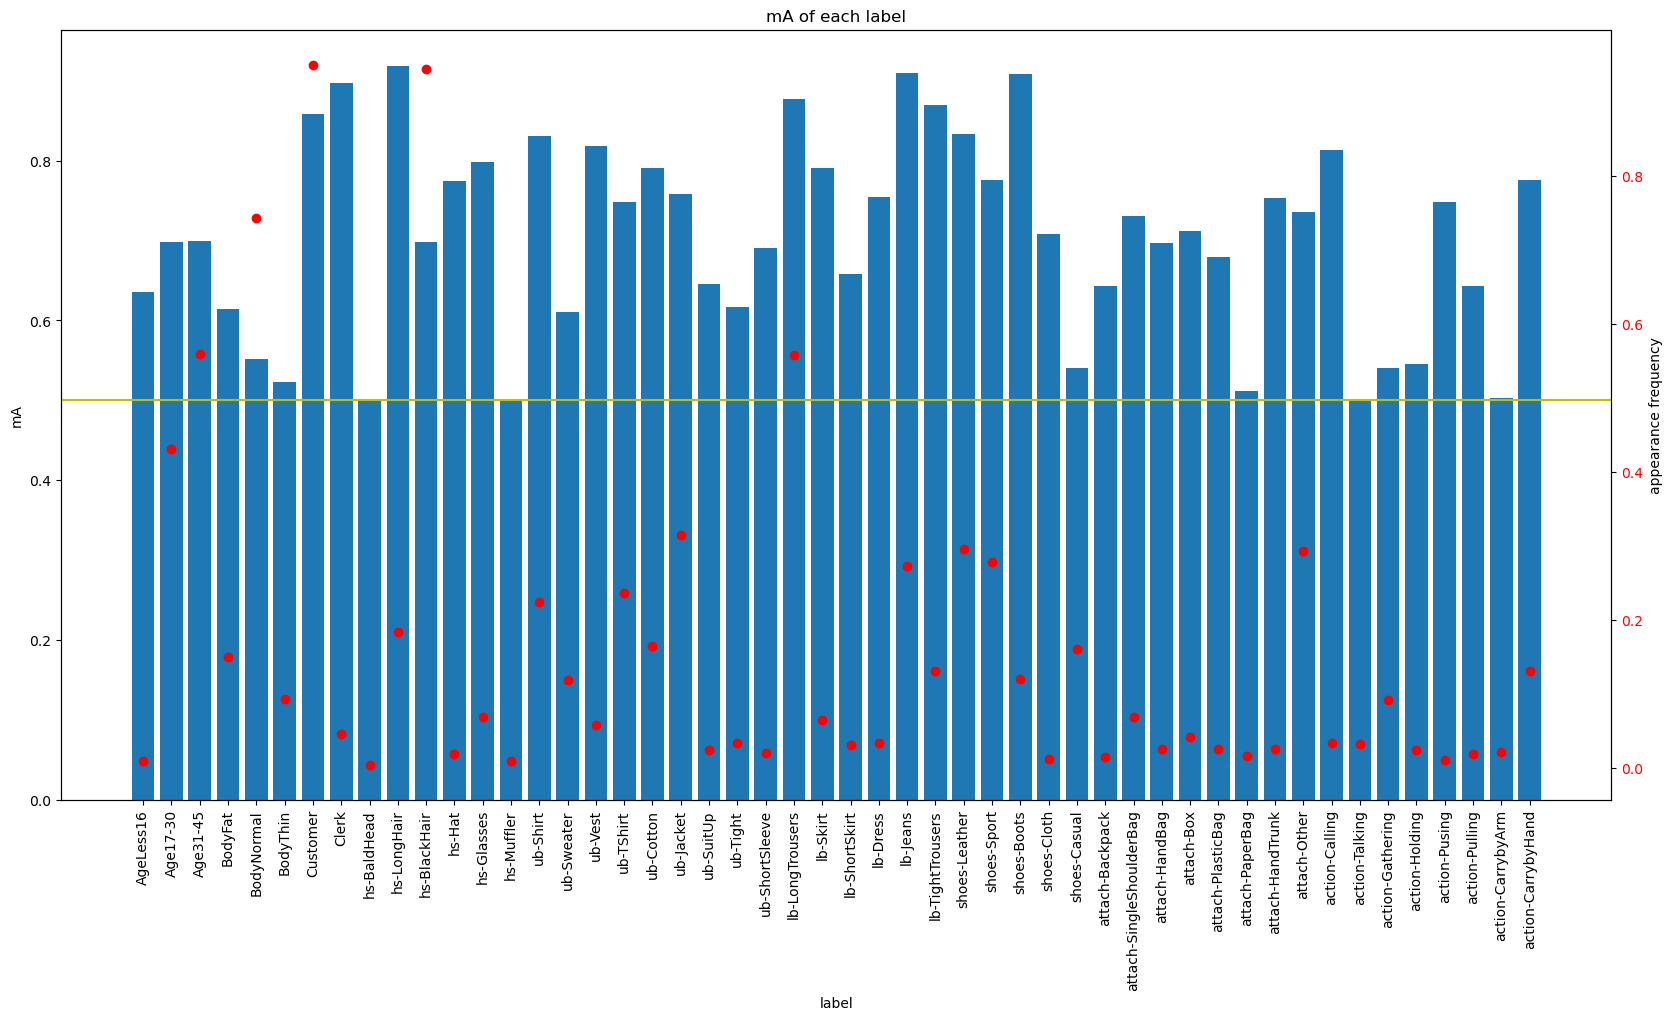

In [5]:
# plot mA of each label from 0.5
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot()
ax1.bar(np.arange(num_classes), mA)
# red horizontal line
ax1.axhline(y=0.5, color='y', linestyle='-')
ax1.set_xticks(np.arange(num_classes), train_dataset.label_str, rotation=90)
ax1.set_xlabel('label')
ax1.set_ylabel('mA')

ax2 = ax1.twinx()
ax2.plot(np.arange(num_classes), gt.mean(axis=0), 'ro', label='gt')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylabel('appearance frequency')
plt.title('mA of each label')
plt.show()

In [6]:
bald_gt = gt[:,8]
bald_pred = pred[:,8]

In [7]:
bald_pred_binary = np.where(bald_pred > 0.5, 1, 0)

In [8]:
bald_pred_binary.mean()

0.0

In [9]:
def label_list_to_str(labels, label_to_str):
    ret = []
    for i, label in enumerate(labels):
        if label == 1:
           ret.append(label_to_str[i])
    return ret 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


gt: ['Age31-45', 'BodyNormal', 'Customer', 'hs-BlackHair', 'ub-Sweater', 'lb-Jeans', 'shoes-Casual'], pred: ['Age17-30', 'BodyNormal', 'Customer', 'hs-BlackHair', 'ub-Shirt', 'lb-Jeans', 'shoes-Sport', 'shoes-Casual']


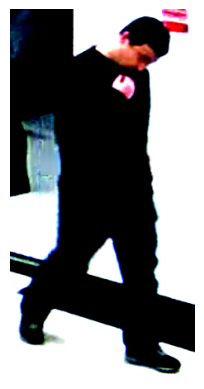

In [11]:
label_to_str = test_dataset.label_str
# sample 1 data
sample_idx = 1
sample_img = test_dataset[sample_idx][0]
sample_label = test_dataset[sample_idx][1]
sample_label_str = label_list_to_str(sample_label, label_to_str)
sample_pred = pred[sample_idx]
sample_pred_binary = np.where(sample_pred > 0.5, 1, 0)
sample_pred_label_str = label_list_to_str(sample_pred_binary, label_to_str)

# plot sample image
plt.imshow(sample_img.permute(1, 2, 0))
print(f'gt: {sample_label_str}, pred: {sample_pred_label_str}')
# remove axis
plt.axis('off')
plt.show()